In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



# Setting up the right shape of the dataframe

In [148]:
df = pd.read_csv('../datasets/spotify_songs.csv')

In [149]:
df.shape

(32833, 23)

In [150]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [151]:
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [152]:
df.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [153]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], format = 'mixed')


In [154]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [155]:
clean_df = df.dropna(subset=['track_name', 'track_artist', 'track_album_name'])

# Verifying the result
print("New DataFrame shape:", clean_df.shape)
clean_df.isnull().sum()

New DataFrame shape: (32828, 23)


track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [156]:
df.dtypes

track_id                            object
track_name                          object
track_artist                        object
track_popularity                     int64
track_album_id                      object
track_album_name                    object
track_album_release_date    datetime64[ns]
playlist_name                       object
playlist_id                         object
playlist_genre                      object
playlist_subgenre                   object
danceability                       float64
energy                             float64
key                                  int64
loudness                           float64
mode                                 int64
speechiness                        float64
acousticness                       float64
instrumentalness                   float64
liveness                           float64
valence                            float64
tempo                              float64
duration_ms                          int64
dtype: obje

In [159]:
df['duration_minutes'] = (df['duration_ms'] / 60000).round(2)

In [160]:
df.drop(columns=['duration_ms'], inplace=True)

should we change the types of categories?

# Starting to do EDA

In [161]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_minutes
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3.25
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2.71
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2.94
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2.82
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3.15


In [162]:
df.drop('mode', axis=1, inplace=True) #this column is irrelevant + there are only two categories thus it can't really add that much value.


In [163]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_minutes']

# Initialize StandardScaler
scaler = MinMaxScaler()
df_compare = df.copy()
# Apply the scaler
df_compare[numeric_columns] = scaler.fit_transform(df_compare[numeric_columns])


<Axes: xlabel='playlist_genre'>

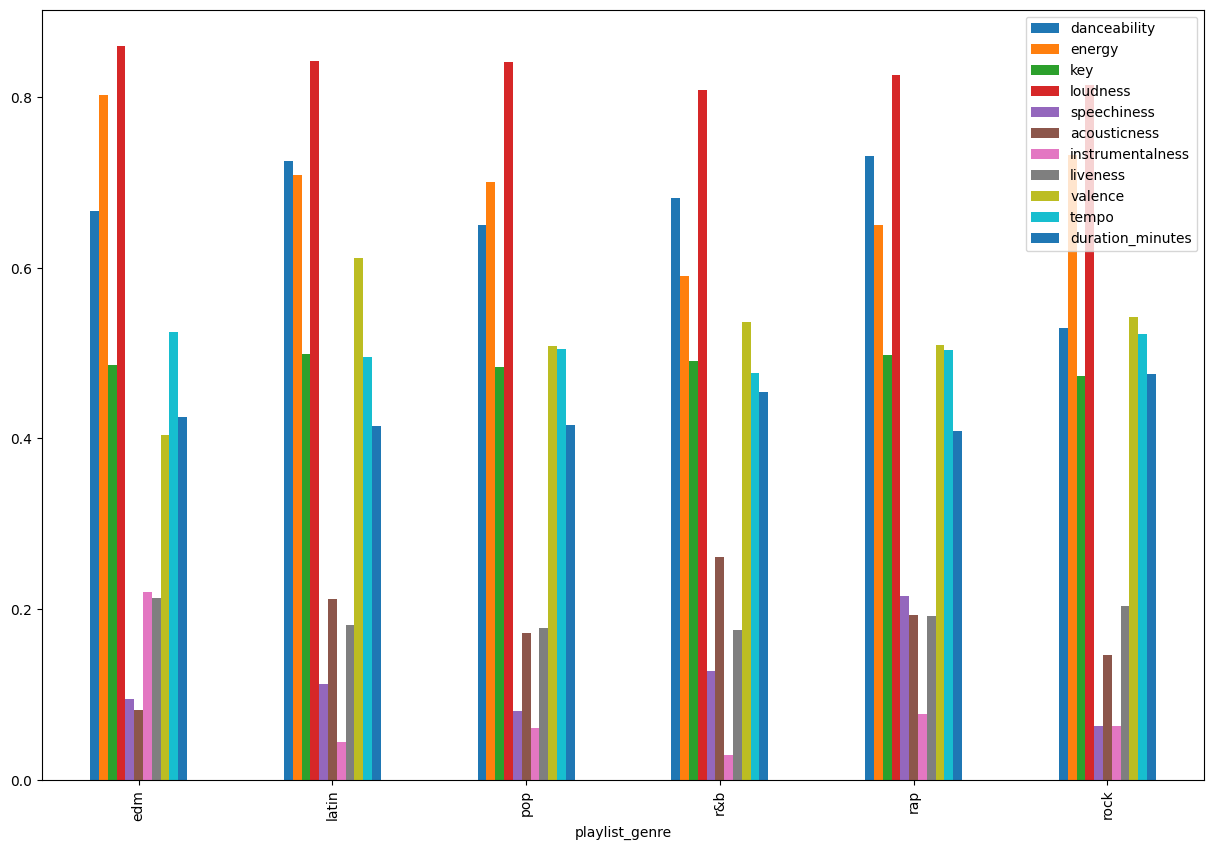

In [164]:
df_compare.groupby('playlist_genre')[['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_minutes']].mean().plot(kind='bar', figsize=(15, 10))

In [165]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_minutes
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.916,6,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3.25
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.815,11,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2.71
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.931,1,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2.94
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.930,7,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2.82
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.833,1,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3.15


/var/folders/sw/6q2vf2dx0r502xm9jxzvdxzc0000gn/T/ipykernel_74935/1401804104.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_compare.groupby('popularity_range')[['danceability', 'energy', 'key', 'loudness', 'speechiness',


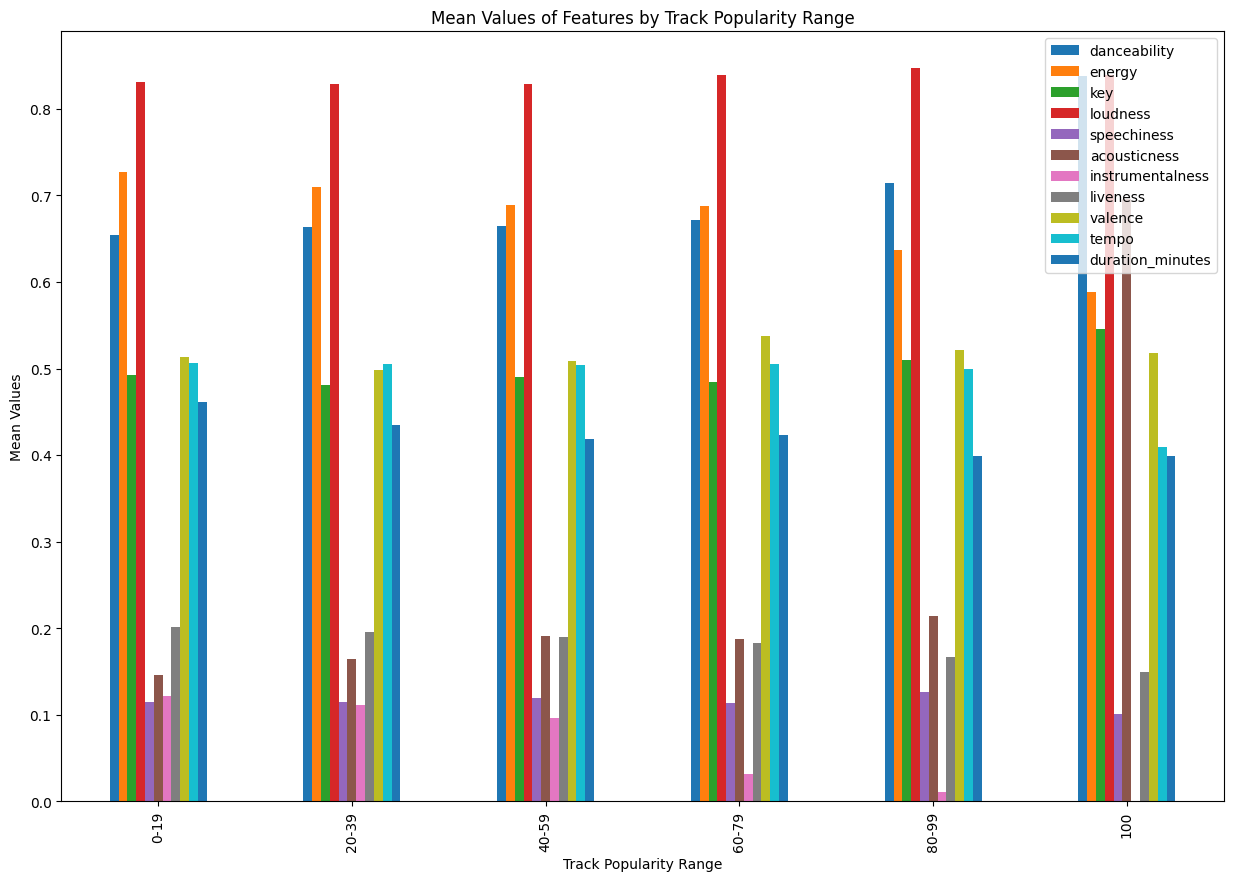

In [166]:
bins = [0, 19, 39, 59, 79, 99, 100]  # Adjust the bins as needed
labels = ['0-19', '20-39', '40-59', '60-79', '80-99', '100']  # Labels for the bins

# Bin 'track_popularity' and create a new column
df_compare['popularity_range'] = pd.cut(df_compare['track_popularity'], bins=bins, labels=labels, include_lowest=True)

# Group by the new 'popularity_range'
grouped_data = df_compare.groupby('popularity_range')[['danceability', 'energy', 'key', 'loudness', 'speechiness',
                                                       'acousticness', 'instrumentalness', 'liveness', 'valence', 
                                                       'tempo', 'duration_minutes']].mean()

# Plot
grouped_data.plot(kind='bar', figsize=(15, 10))
plt.xlabel('Track Popularity Range')
plt.ylabel('Mean Values')
plt.title('Mean Values of Features by Track Popularity Range')
plt.show()

<Axes: xlabel='track_popularity'>

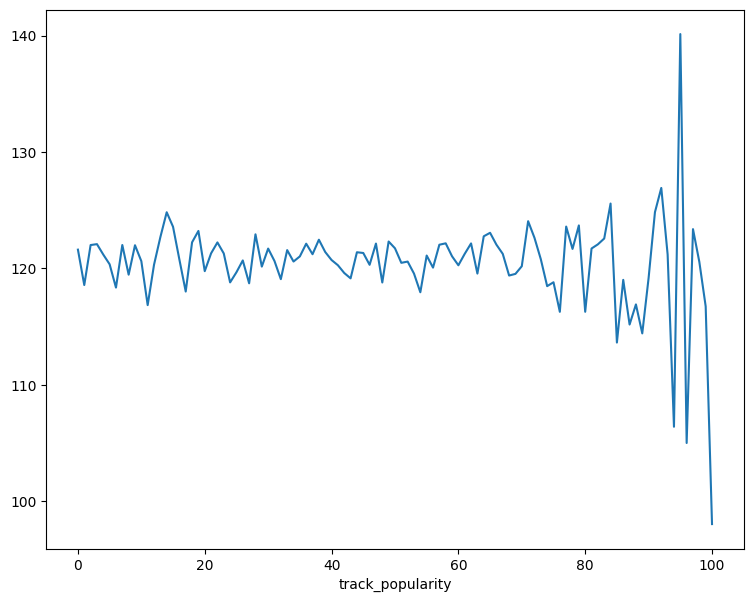

In [167]:
df.groupby('track_popularity')['tempo'].mean().plot(kind='line', figsize=(9, 7))

In [168]:
# Select columns where the dtype is 'object'
numeric_columns = df.loc[:, df.dtypes != 'object']
numeric_columns.columns


Index(['track_popularity', 'track_album_release_date', 'danceability',
       'energy', 'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_minutes'],
      dtype='object')

In [185]:
df.dtypes
categories = ['playlist_genre', 'playlist_subgenre', 'track_artist', 'track_album_name']

# Encoding

In [186]:
label_mappings = {}

# Iterate over columns and apply LabelEncoder to object type columns
for column in categories:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

        # Store the mapping for this specific column
        label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the label mappings
print("Label Encoding mappings:")
for column, mapping in label_mappings.items():
    print(f"{column}: {mapping}")

Label Encoding mappings:
playlist_genre: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
playlist_subgenre: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23}
track_artist: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91,

# Understanding feature importance

In [177]:
df.dtypes

track_id                            object
track_name                          object
track_artist                         int64
track_popularity                     int64
track_album_id                      object
track_album_name                     int64
track_album_release_date    datetime64[ns]
playlist_name                       object
playlist_id                         object
playlist_genre                       int64
playlist_subgenre                    int64
danceability                       float64
energy                             float64
key                                  int64
loudness                           float64
speechiness                        float64
acousticness                       float64
instrumentalness                   float64
liveness                           float64
valence                            float64
tempo                              float64
duration_minutes                   float64
dtype: object

In [183]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd


X = df.select_dtypes(include=[np.number]).drop(columns=['track_popularity'])
y = df['track_popularity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Print the feature importances
print(feature_importances)


duration_minutes     0.081447
loudness             0.080774
energy               0.077404
tempo                0.077061
instrumentalness     0.076972
track_album_name     0.072851
track_artist         0.068664
danceability         0.068107
speechiness          0.067959
valence              0.067446
acousticness         0.066439
liveness             0.065326
playlist_subgenre    0.063580
playlist_genre       0.033276
key                  0.032694
dtype: float64


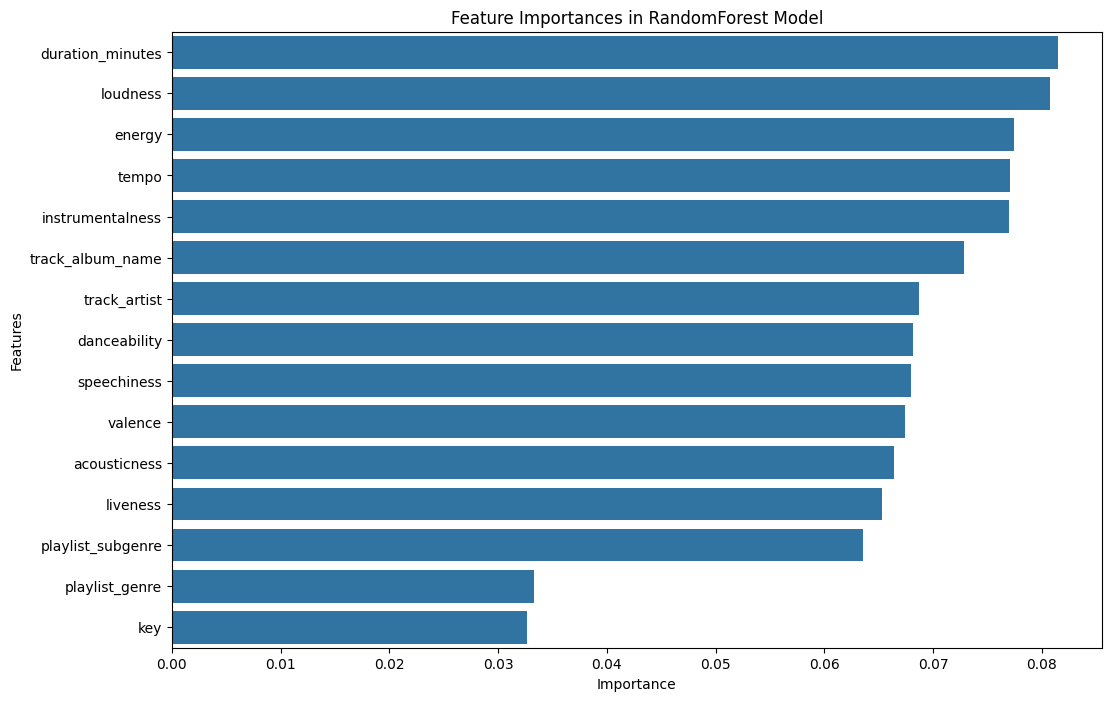

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.barplot(x=feature_importances, y=feature_importances.index)

plt.title('Feature Importances in RandomForest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


# Understanding distribution

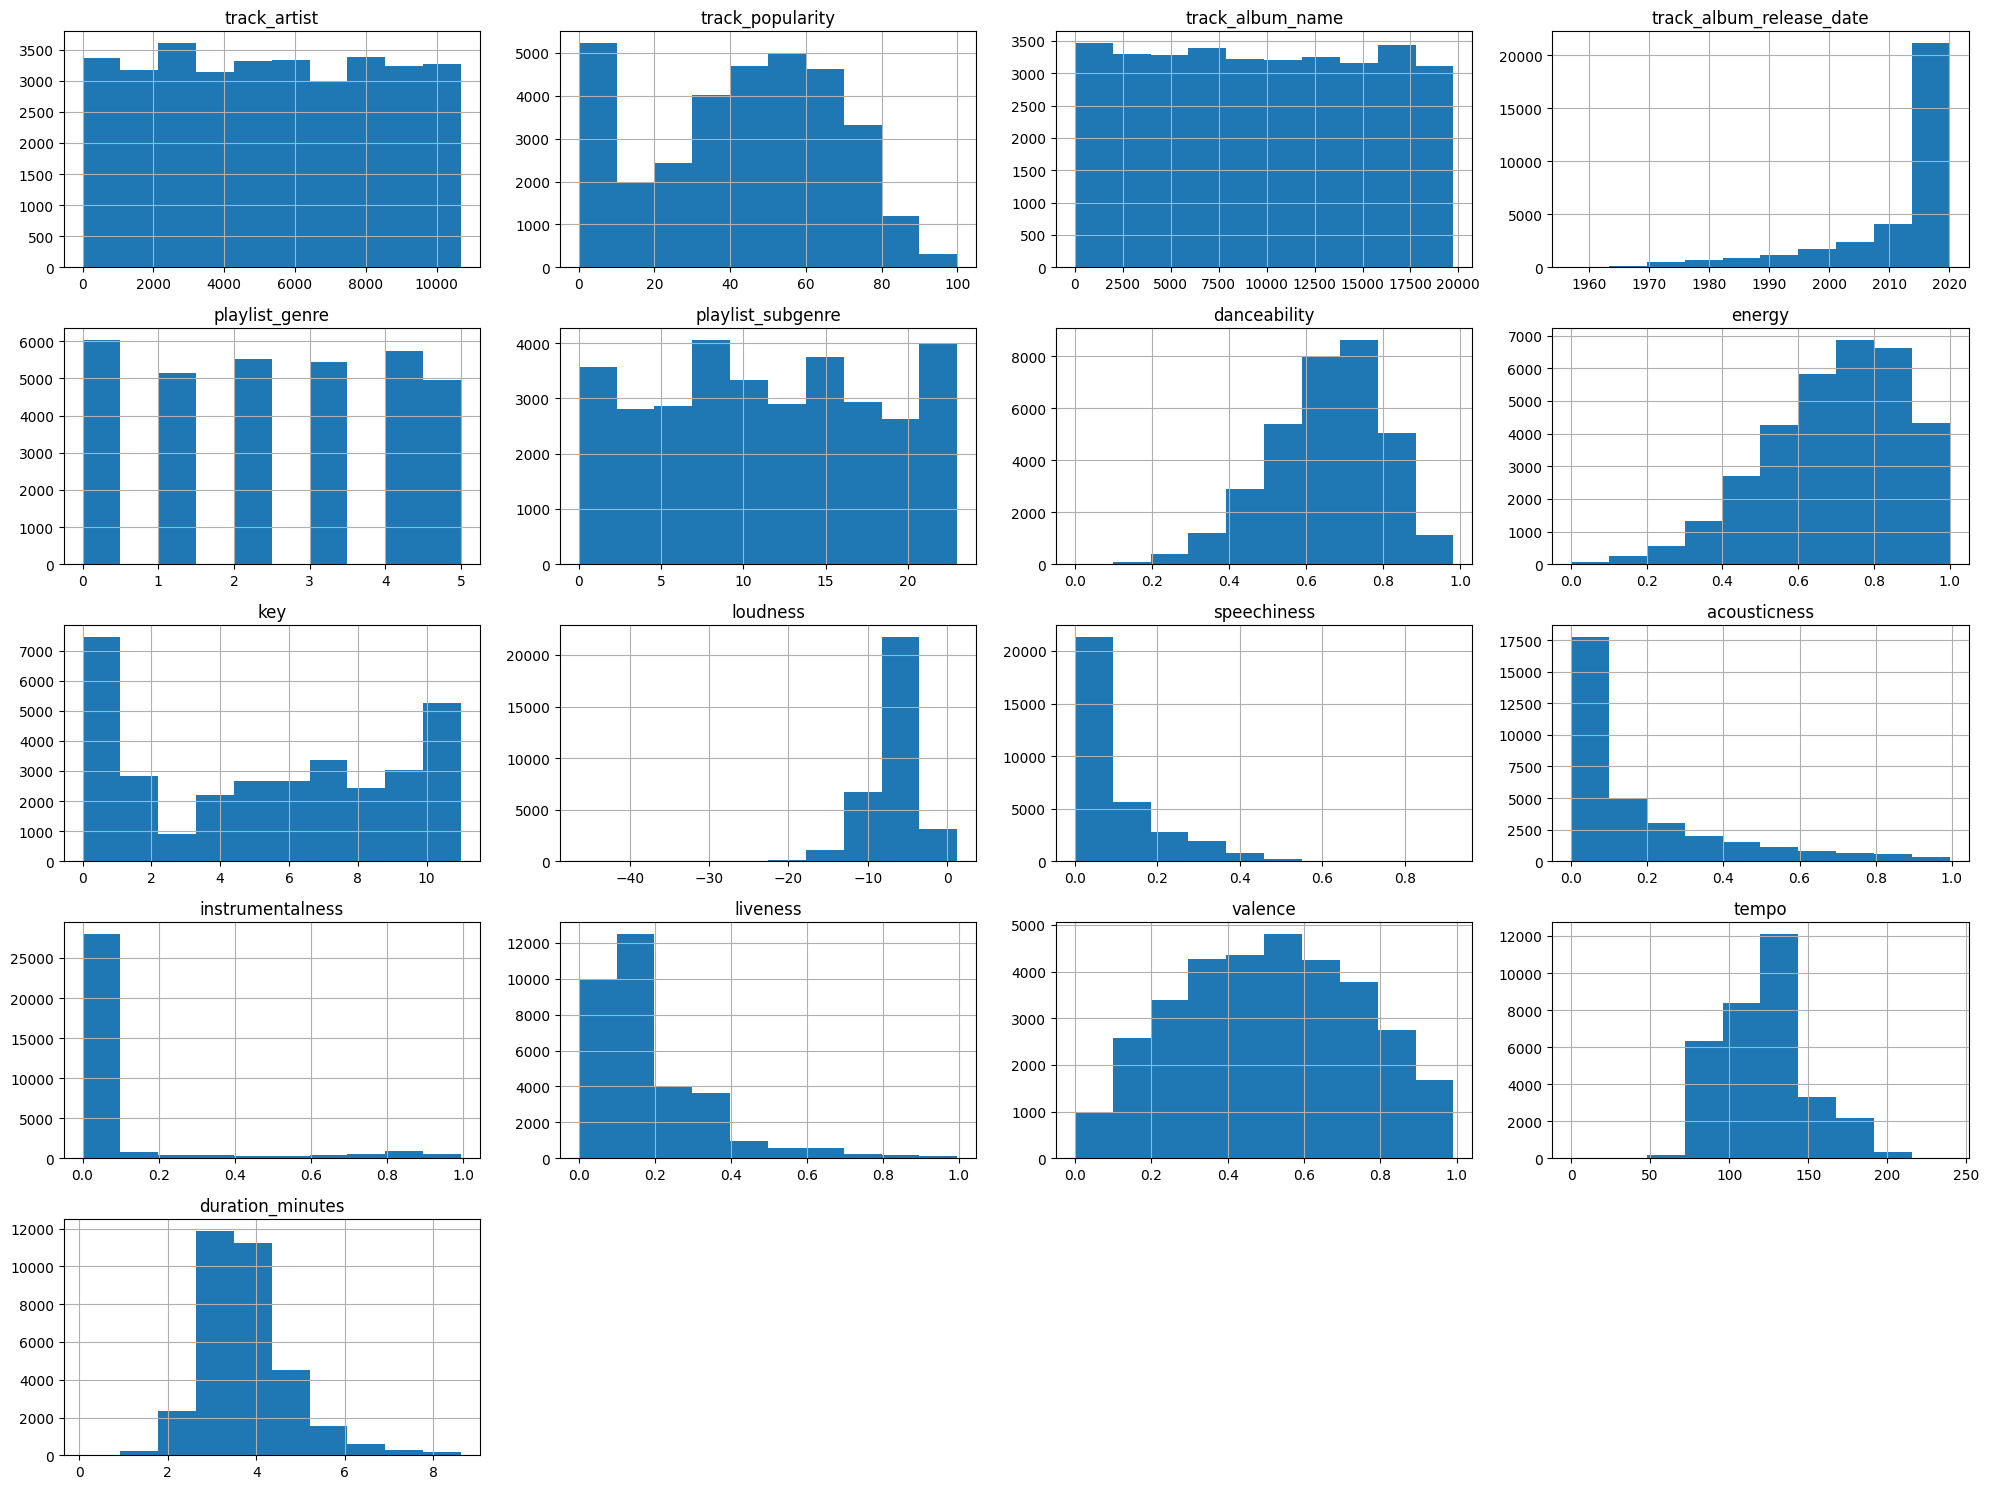

In [188]:
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()


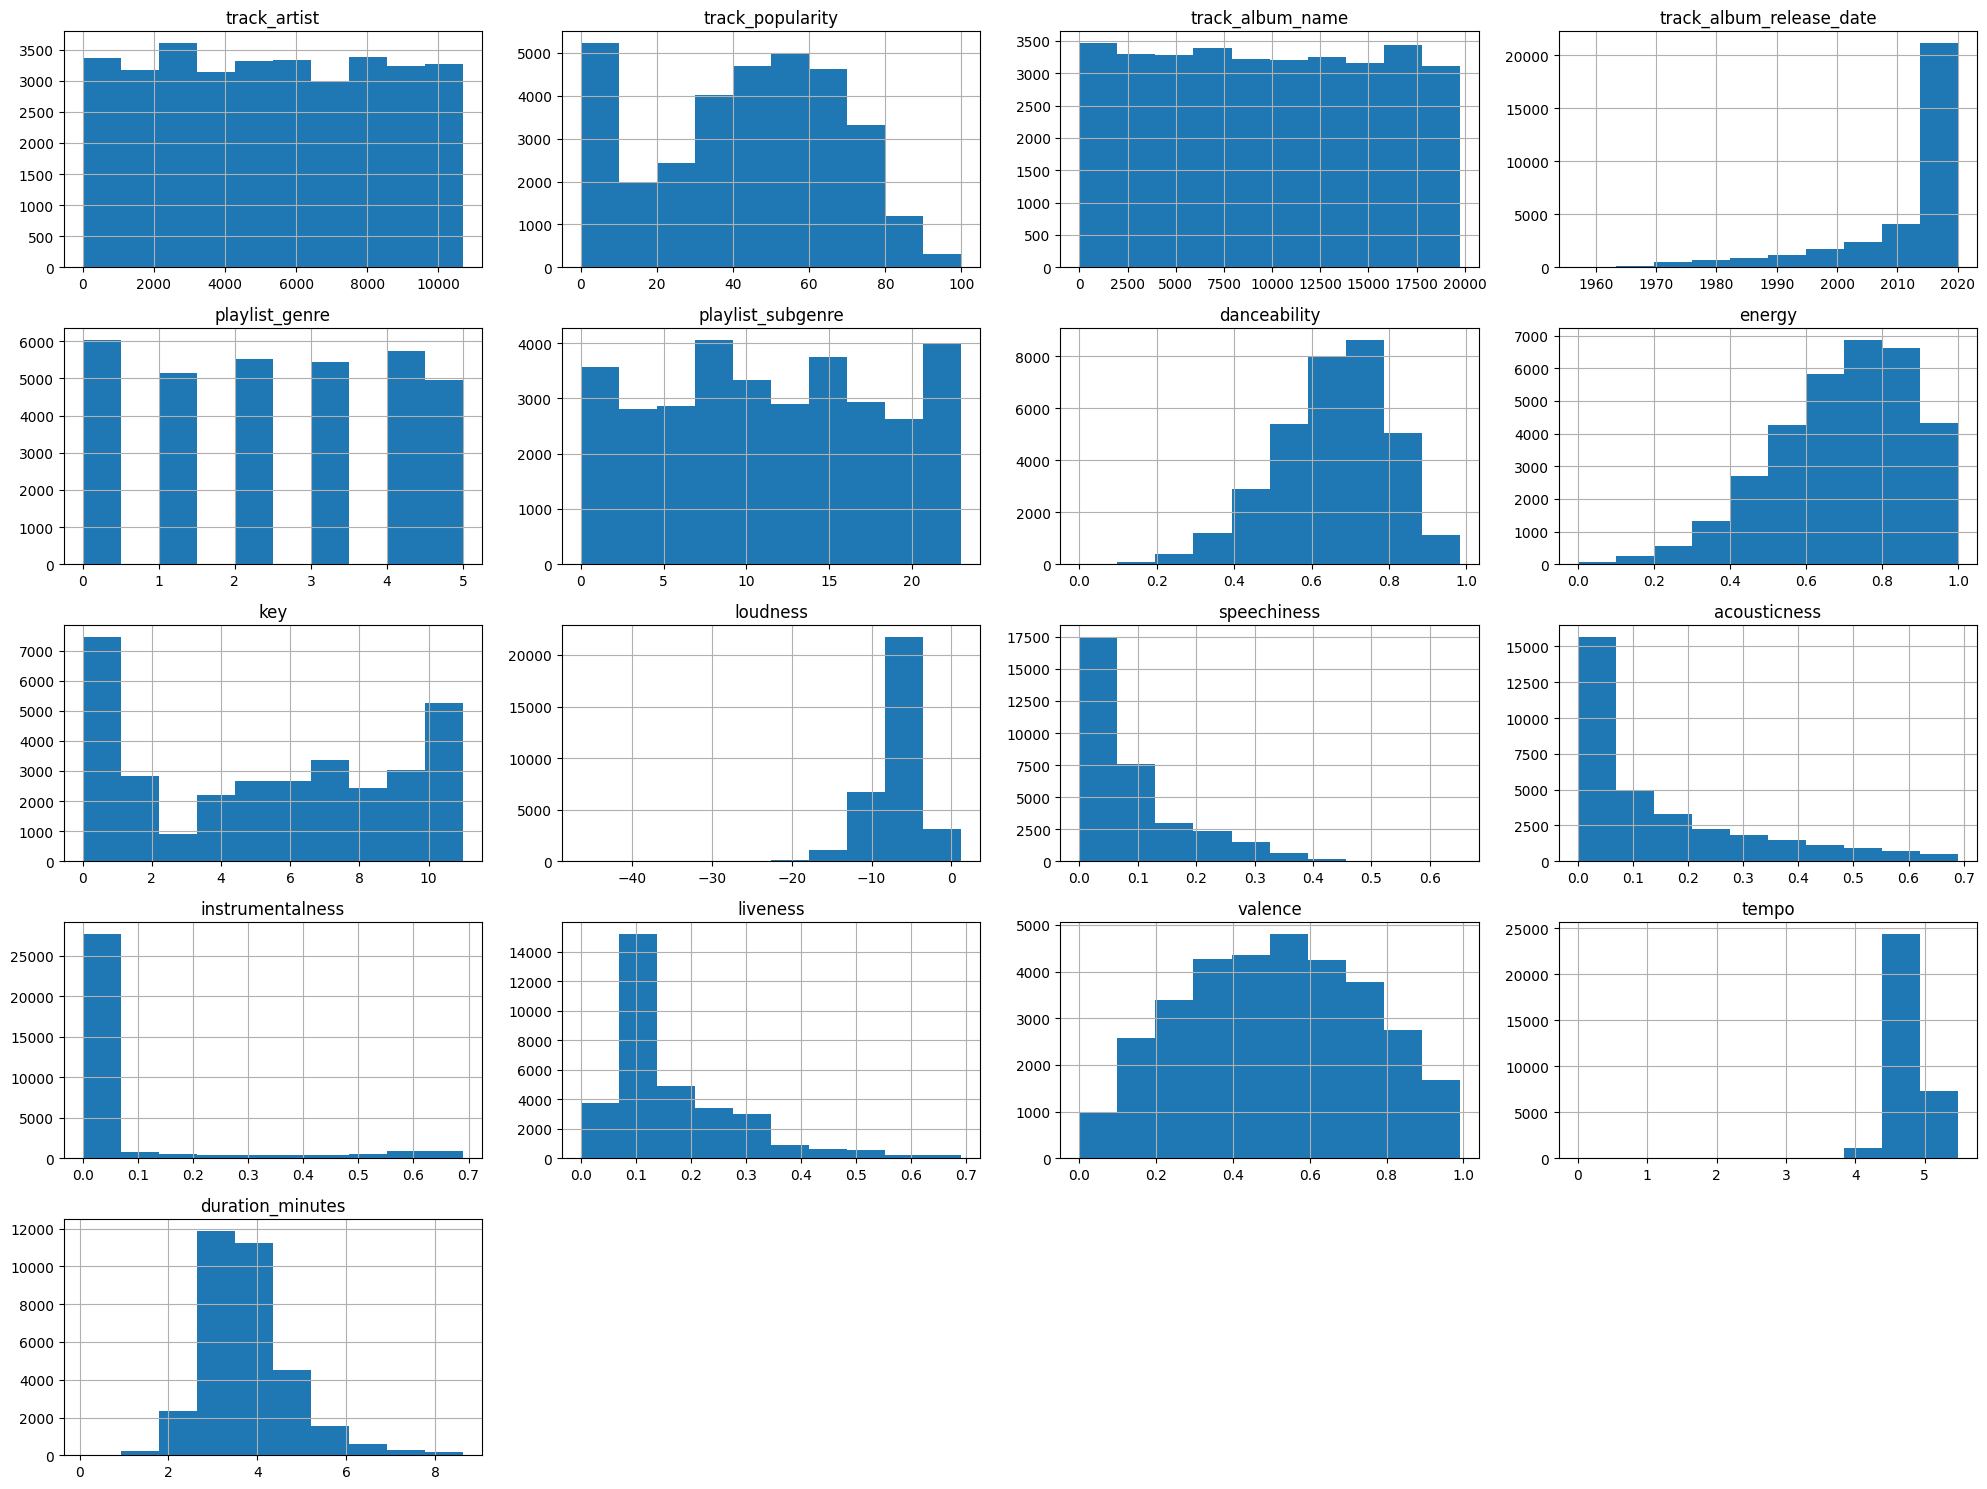

In [208]:
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

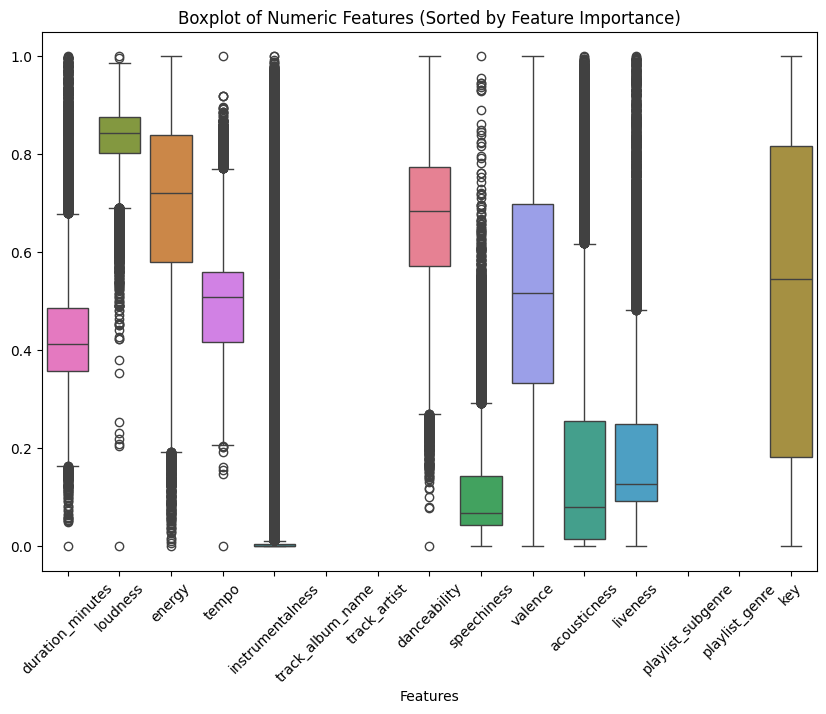

In [203]:
plt.figure(figsize=(10, 7))

# Sort the features by importance
sorted_features = feature_importances.index

# Create the boxplot
sns.boxplot(data=df_compare.drop('track_popularity', axis=1), order=sorted_features)

plt.title('Boxplot of Numeric Features (Sorted by Feature Importance)')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()
